<a href="https://colab.research.google.com/github/yuriishizawa/stock_analysis/blob/main/apresentacao_analise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Retorno de Ações e Avaliação de Desempenho de Carteira

#### **Autor**: Yuri Batista Ishizawa
#### **e-mail**: yuriishizawa@gmail.com
#### **Github**: https://github.com/yuriishizawa
#### **LinkedIn**: https://www.linkedin.com/in/yuriishizawa

## Importação dos pacotes
É necessário resetar o notebook para aplicar as atualizações dos pacotes.

In [1]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from stock_analysis.app import (
    get_stock_data,
    format_tickers_with_suffix,
    plot_melted,
    generate_portifolio,
)

import plotly.figure_factory as ff
import numpy as np


yf.pdr_override()

sns.set()

In [2]:
START_DATE = "2022-01-01"

## Coleta dos dados

Foram consideradas as 20 maiores empresas da BOVESPA em termos de valor de mercado. 

Fonte: https://www.meusdividendos.com/empresas/ranking?q=valorMercado

In [3]:
"BBAS3,CSMG3,TRPL4,NEOE3,BBSE3,CMIG4,GOAU4,KLBN4,SAPR4,BRAP4"

'BBAS3,CSMG3,TRPL4,NEOE3,BBSE3,CMIG4,GOAU4,KLBN4,SAPR4,BRAP4'

In [4]:
tickers = format_tickers_with_suffix(
    tickers_str="BBAS3,CSMG3,TRPL4,NEOE3,BBSE3,CMIG4,GOAU4,KLBN4,SAPR4,BRAP4"
)

2024-04-02 15:38:54.264 | INFO     | stock_analysis.app:format_tickers_with_suffix:120 - Tickers ajustados: ['BBAS3.SA', 'CSMG3.SA', 'TRPL4.SA', 'NEOE3.SA', 'BBSE3.SA', 'CMIG4.SA', 'GOAU4.SA', 'KLBN4.SA', 'SAPR4.SA', 'BRAP4.SA']


[15:38:54 INFO] Tickers ajustados: ['BBAS3.SA', 'CSMG3.SA', 'TRPL4.SA', 'NEOE3.SA', 'BBSE3.SA', 'CMIG4.SA', 'GOAU4.SA', 'KLBN4.SA', 'SAPR4.SA', 'BRAP4.SA'] (app.py:120)


In [5]:
stock_data = get_stock_data(
    tickers, start=START_DATE, end=datetime.now().strftime("%Y-%m-%d")
)

[*********************100%%**********************]  10 of 10 completed


In [6]:
stock_data

,BBAS3.SA,BBSE3.SA,BRAP4.SA,CMIG4.SA,CSMG3.SA,GOAU4.SA,KLBN4.SA,NEOE3.SA,SAPR4.SA,TRPL4.SA
Date,,,,,,,,,,
2022-01-03,24.573376,16.623743,19.358727,7.320581,9.872087,8.808236,4.347674,13.797019,3.170994,21.198881
2022-01-04,24.598955,16.583391,19.539354,7.314897,9.863969,8.987679,4.364995,13.570695,3.145143,21.225128
2022-01-05,24.189684,16.381647,19.586477,7.081866,9.685363,8.808236,4.217763,13.309553,3.110675,20.910164
2022-01-06,24.385794,16.494627,20.144070,6.928408,9.401216,8.784829,4.269727,13.153099,3.024508,20.813927
2022-01-07,24.411371,15.978158,20.937269,6.968195,9.409334,8.917460,4.165800,12.898467,3.067591,20.700186
...,...,...,...,...,...,...,...,...,...,...
2024-03-28,56.619999,32.520000,20.590000,12.560000,21.780001,10.290000,5.030000,20.350000,5.250000,24.820000
2024-03-29,56.619999,32.520000,20.590000,12.560000,21.780001,10.290000,5.030000,20.350000,5.250000,24.820000
2024-03-30,56.619999,32.520000,20.590000,12.560000,21.780001,10.290000,5.030000,20.350000,5.250000,24.820000


## Análise Exploratória dos Dados

## Obtenção do retorno diário acumulado

In [7]:
returns = stock_data.apply(lambda x: x / x[0])

fig, df_return_melted = plot_melted(returns, "Retorno diário acumulado", dash=True)
fig.show()

### Agrupando tickers de acordo com retornos

<Figure size 640x480 with 0 Axes>

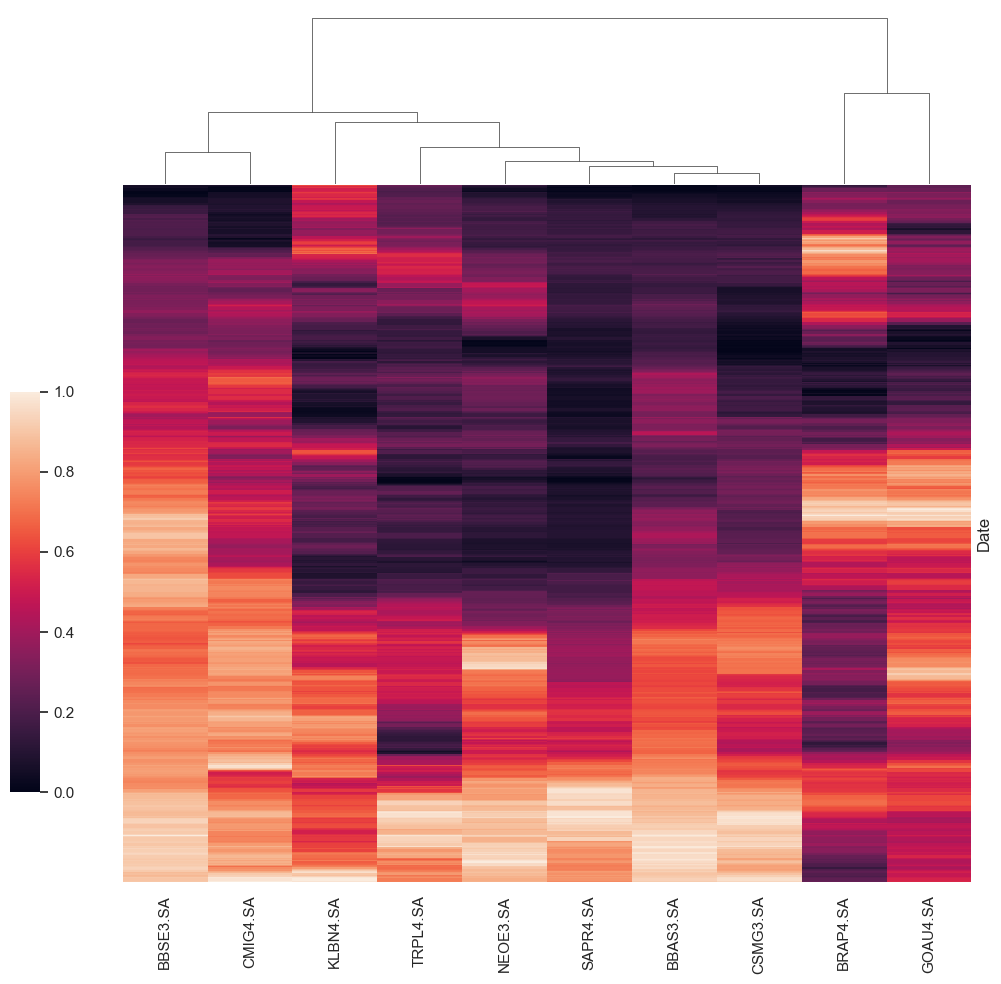

In [8]:
plt.figure()
sns.clustermap(
    returns,
    row_cluster=False,
    metric="correlation",
    yticklabels=False,
    standard_scale=1,
    dendrogram_ratio=(0.1, 0.2),
    cbar_pos=(0, 0.2, 0.03, 0.4),
)
plt.show()

In [9]:
np.random.seed(1)
fig = ff.create_dendrogram(returns.T, labels=returns.columns)
fig.show()

### Análise de volatilidade

In [10]:
pct_returns = stock_data.pct_change().dropna()
fig3, _ = plot_melted(pct_returns, "Retorno diário")

In [11]:
mean_std = pd.DataFrame(
    pct_returns.mean(), index=pct_returns.mean().index, columns=["Média"]
)
mean_std["Desvio-padrão"] = pct_returns.std().values
fig = px.scatter(mean_std.reset_index(), x="Desvio-padrão", y="Média", text="index")
fig.add_hline(0, line_dash="dash")
fig.show()

# Análise de performance de portifólio

### Gerando carteira com pesos aleatórios para cada ticker

### Gráfico de pizza agrupando por setores

In [23]:
portifolio = generate_portifolio(stock_data, max_share=10)
portifolio

,Ticker,Preço Ajustado,Setor,Quantidade,Total Investido,Porc. da Carteira
0,BBAS3.SA,24.573376,Financial Services,300.0,7372.01,14.790643
1,BBSE3.SA,16.623743,Financial Services,500.0,8311.87,16.676307
2,BRAP4.SA,19.358727,Financial Services,400.0,7743.49,15.535952
3,CMIG4.SA,7.320581,Utilities,800.0,5856.47,11.749978
4,CSMG3.SA,9.872087,Utilities,100.0,987.21,1.980663
5,GOAU4.SA,8.808236,Basic Materials,700.0,6165.77,12.370534
6,KLBN4.SA,4.347674,Basic Materials,400.0,1739.07,3.489138
7,NEOE3.SA,13.797019,Utilities,600.0,8278.21,16.608774
8,SAPR4.SA,3.170994,Utilities,400.0,1268.40,2.544822
9,TRPL4.SA,21.198881,Utilities,100.0,2119.89,4.253187


In [24]:
fig = px.sunburst(
    portifolio,
    path=["Setor", "Ticker"],
    values="Porc. da Carteira",
    hover_data=["Total Investido"],
    width=700,
    height=700,
    title="Distribuição dos papéis na carteira",
)
fig.show()

## Retorno da Carteira

In [27]:
portifolio_return = np.dot(
    returns.values, portifolio.set_index("Ticker")["Porc. da Carteira"].div(100).values
)

ibov = pdr.DataReader(
    "^BVSP", start=START_DATE, end=datetime.now().strftime("%Y-%m-%d")
)
ibov = ibov.apply(lambda x: x / x[0])["Adj Close"]

fig = go.Figure()
fig.add_trace(
    go.Scatter(x=returns.index, y=portifolio_return, mode="lines", name="Carteira")
)

fig.add_hline(1, line_dash="dash")
fig.add_trace(go.Scatter(x=ibov.index, y=ibov.values, mode="lines", name="IBOV"))
fig.update_layout(
    title="Performance da Carteira vs Performance IBOV",
    xaxis_title="Data",
    yaxis_title="Retorno diário acumulado",
)
return_pct = (portifolio_return[-1] - 1) * 100
fig.show()
print(
    f"Para o valor investido de {portifolio['Total Investido'].sum():.02f} reais, em "
    f"{START_DATE}, seria possível, com nossa carteira, gerar um rendimento de: "
    f"{portifolio['Total Investido'].sum()*return_pct:.02f} reais "
    f"({return_pct:.02f}%)"
)

[*********************100%%**********************]  1 of 1 completed


Para o valor investido de 49842.39 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 2999762.26 reais (60.18%)


# Simula vários portifólios

In [29]:
return_results = pd.DataFrame()

for i in range(1, 11):
    portifolio = generate_portifolio(stock_data)
    portifolio_return = np.dot(
        returns.values,
        portifolio.set_index("Ticker")["Porc. da Carteira"].div(100).values,
    )

    ibov = pdr.DataReader(
        "^BVSP", start=START_DATE, end=datetime.now().strftime("%Y-%m-%d")
    )
    ibov = ibov.apply(lambda x: x / x[0])["Adj Close"]

    fig = go.Figure()
    fig.add_trace(
        go.Scatter(x=returns.index, y=portifolio_return, mode="lines", name="Carteira")
    )

    fig.add_hline(1, line_dash="dash")
    fig.add_trace(go.Scatter(x=ibov.index, y=ibov.values, mode="lines", name="IBOV"))
    fig.update_layout(
        title="Performance da Carteira vs Performance IBOV",
        xaxis_title="Data",
        yaxis_title="Retorno diário acumulado",
    )

    return_pct = (portifolio_return[-1] - 1) * 100

    # fig.show()
    print(
        f"Para o valor investido de {portifolio['Total Investido'].sum():.02f} reais, em "
        f"{START_DATE}, seria possível, com nossa carteira, gerar um rendimento de: "
        f"{portifolio['Total Investido'].sum()*return_pct:.02f} reais "
        f"({return_pct:.02f}%)"
    )
    print("Distribuição da carteirao:")

    display(portifolio[["Ticker", "Porc. da Carteira"]].round(2))

    return_aux = portifolio[["Ticker", "Porc. da Carteira"]].round(2)
    return_aux["Rendimento"] = return_pct
    return_results = return_results.append(return_aux)

[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 26294.16 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1555886.01 reais (59.17%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,9.35
1,BBSE3.SA,12.64
2,BRAP4.SA,7.36
3,CMIG4.SA,16.70
4,CSMG3.SA,7.51
5,GOAU4.SA,6.70
6,KLBN4.SA,9.92
7,NEOE3.SA,5.25
8,SAPR4.SA,8.44
9,TRPL4.SA,16.12


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 26176.39 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1291765.11 reais (49.35%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,9.39
1,BBSE3.SA,12.70
2,BRAP4.SA,14.79
3,CMIG4.SA,2.80
4,CSMG3.SA,3.77
5,GOAU4.SA,16.82
6,KLBN4.SA,1.66
7,NEOE3.SA,15.81
8,SAPR4.SA,6.06
9,TRPL4.SA,16.20


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 23974.85 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1719415.97 reais (71.72%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,10.25
1,BBSE3.SA,13.87
2,BRAP4.SA,8.07
3,CMIG4.SA,18.32
4,CSMG3.SA,16.47
5,GOAU4.SA,7.35
6,KLBN4.SA,1.81
7,NEOE3.SA,5.75
8,SAPR4.SA,9.26
9,TRPL4.SA,8.84


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 40197.24 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 2559476.56 reais (63.67%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,12.23
1,BBSE3.SA,12.41
2,BRAP4.SA,14.45
3,CMIG4.SA,12.75
4,CSMG3.SA,12.28
5,GOAU4.SA,13.15
6,KLBN4.SA,2.16
7,NEOE3.SA,13.73
8,SAPR4.SA,1.58
9,TRPL4.SA,5.27


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 34572.09 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 2371789.56 reais (68.60%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,14.22
1,BBSE3.SA,14.43
2,BRAP4.SA,5.60
3,CMIG4.SA,8.47
4,CSMG3.SA,17.13
5,GOAU4.SA,10.19
6,KLBN4.SA,8.80
7,NEOE3.SA,7.98
8,SAPR4.SA,0.92
9,TRPL4.SA,12.26


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 41299.00 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 2835002.76 reais (68.65%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,11.90
1,BBSE3.SA,16.10
2,BRAP4.SA,14.06
3,CMIG4.SA,12.41
4,CSMG3.SA,16.73
5,GOAU4.SA,4.27
6,KLBN4.SA,6.32
7,NEOE3.SA,3.34
8,SAPR4.SA,4.61
9,TRPL4.SA,10.27


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 44164.98 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 2390901.79 reais (54.14%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,16.69
1,BBSE3.SA,3.76
2,BRAP4.SA,13.15
3,CMIG4.SA,13.26
4,CSMG3.SA,2.24
5,GOAU4.SA,7.98
6,KLBN4.SA,7.88
7,NEOE3.SA,15.62
8,SAPR4.SA,5.03
9,TRPL4.SA,14.40


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 32079.89 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 2250110.17 reais (70.14%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,15.32
1,BBSE3.SA,15.55
2,BRAP4.SA,18.10
3,CMIG4.SA,6.85
4,CSMG3.SA,18.46
5,GOAU4.SA,2.75
6,KLBN4.SA,6.78
7,NEOE3.SA,8.60
8,SAPR4.SA,0.99
9,TRPL4.SA,6.61


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 47450.75 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 2757126.02 reais (58.11%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,5.18
1,BBSE3.SA,14.01
2,BRAP4.SA,12.24
3,CMIG4.SA,9.26
4,CSMG3.SA,14.56
5,GOAU4.SA,11.14
6,KLBN4.SA,3.67
7,NEOE3.SA,14.54
8,SAPR4.SA,2.00
9,TRPL4.SA,13.40


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



[*********************100%%**********************]  1 of 1 completed
Para o valor investido de 24711.94 reais, em 2022-01-01, seria possível, com nossa carteira, gerar um rendimento de: 1612304.89 reais (65.24%)
Distribuição da carteirao:


,Ticker,Porc. da Carteira
0,BBAS3.SA,9.94
1,BBSE3.SA,13.45
2,BRAP4.SA,7.83
3,CMIG4.SA,14.81
4,CSMG3.SA,15.98
5,GOAU4.SA,10.69
6,KLBN4.SA,10.56
7,NEOE3.SA,5.58
8,SAPR4.SA,2.57
9,TRPL4.SA,8.58


/var/folders/qy/yp2r0rpn4h995fn802xksst40000gq/T/ipykernel_27312/2721814573.py:43: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

